In [ ]:
pip install prince

In [2]:
import prince

In [3]:
import pickle
import pandas as pd
import nltk
import numpy as np
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from itertools import product
import matplotlib.pyplot as plt
import statistics

In [4]:
test_data = pd.read_csv('/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/apple_unseen_data.csv')

In [5]:
test_data.head()

,Label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,Hold,-0.222598,0.748105,0.485288,-0.118639,0.900491,-0.557271,0.961600,0.698754,0.644912,-0.316916,-0.010139,0.847396,0.584393,0.047089,-0.517484,-0.264255,-0.517813,0.486616,0.246014,-0.220483,-0.551734,-0.596142,0.108173,0.020995,1.129889,0.541480,0.448371,-0.323928,-0.407566,0.371477,-0.310437,1.459580,-0.517393,-0.508452,-0.808173,0.220383,-0.579218,0.590688,-0.078066,...,-0.616729,-0.622845,-0.409627,-1.158956,0.227853,0.987284,0.117022,0.271497,0.104969,-0.366703,-0.567497,-1.632088,-0.136654,0.450058,-0.655765,-0.529459,0.085008,0.322147,-0.046987,-0.246344,-0.275842,0.093232,0.170750,-0.970542,0.124097,0.105758,-0.789086,0.112604,0.105249,-0.654910,-0.537238,-0.975833,-1.754885,0.702908,0.613692,-0.092991,0.197458,-0.599833,-0.256600,0.453896
1,Hold,-0.870338,0.235897,0.177161,-0.060832,1.014795,-0.733983,-0.638219,0.580018,-0.531315,-0.725112,0.380000,0.765162,0.707654,-0.006055,-0.364947,-0.077112,0.425554,0.606706,-0.339503,-1.036398,-0.891776,-0.390247,0.446263,0.181805,0.724459,0.384605,-0.678302,-0.597934,-0.590485,0.256212,-0.828184,0.256212,-0.277979,0.027087,0.570141,-0.008219,-0.726885,-0.656821,-0.119314,...,-0.282978,-0.584410,-0.630456,-0.526689,0.375842,0.006002,-0.629995,0.267400,0.603206,-0.524851,-0.651171,-1.230638,0.288966,-0.428947,-0.449530,-1.508016,0.246104,0.440717,-0.457524,-0.124603,-0.216190,-0.055509,0.366039,-0.826116,0.478645,1.518625,-0.352250,0.509205,-0.098223,0.017005,-0.025829,0.028371,-0.836320,0.111291,1.012991,-0.766528,-0.755766,-0.023098,1.275916,-0.134305
2,Hold,-0.442109,0.478925,0.125425,0.201929,1.077210,-0.353761,-0.337223,0.556410,0.083395,-0.212093,-0.102887,0.430919,0.273721,-0.055044,-0.713577,0.544598,-0.615964,0.172747,-0.084699,-0.781385,-0.203870,-0.608176,0.321871,0.594021,1.205984,-0.041820,0.052715,-0.609092,-1.005692,-0.074188,-0.753373,0.541640,-0.513618,-0.374426,0.195916,0.434490,-0.355440,-0.161941,-0.257569,...,-0.669705,-0.633738,0.074056,-0.217908,0.548727,0.845867,0.270689,0.283931,0.431459,-0.300325,-0.975098,-1.294832,-0.442116,-0.310437,-0.102694,0.023254,0.363903,0.630929,0.027109,-0.297374,-0.009592,-0.125860,-0.285189,-1.080241,0.868335,0.649717,0.096418,0.474695,-0.426376,0.435644,-0.084565,-0.517118,-1.065985,0.031421,0.105758,-0.707993,-0.018756,-0.127108,-0.035858,-0.245689
3,Hold,0.067986,1.427715,0.407314,-0.489392,0.815869,0.463780,1.118302,0.885608,0.176066,-0.206627,-0.384975,0.486316,0.239158,-0.047174,-0.587016,-0.325037,-0.495340,0.477149,0.170262,0.030439,-0.542157,-1.020790,0.174149,0.176583,1.138015,0.311608,-0.153014,0.237447,-0.310285,0.394998,-0.749336,0.381146,0.274044,-1.044946,-0.261766,-0.015938,-0.986850,0.196404,-0.300049,...,-0.718957,-0.301005,-0.163546,-0.593132,0.294598,0.948908,-0.023430,0.317777,0.399759,-0.745440,0.124729,-1.955545,-0.489624,1.126911,-0.601347,-0.119431,0.066007,0.146149,-0.345404,0.094044,-1.139542,-0.784869,0.751440,-1.242246,-0.141164,0.621733,-0.579748,0.365992,0.379163,-0.765721,-0.506313,-0.778286,-1.493551,0.673587,-0.012527,0.030688,0.247981,-0.651948,-0.388263,-0.164766
4,Hold,-0.127278,0.206105,2.125548,-0.090224,1.316796,-0.879829,-0.937623,1.152500,0.412005,-0.918070,0.029844,0.479169,0.811489,0.425634,0.382810,0.844459,-0.076057,0.449275,0.134055,-0.848540,-0.167815,-0.991550,0.703316,-0.054036,0.884157,-0.949081,-0.690108,-1.141005,0.280243,0.359091,-1.138352,0.454745,-0.500308,-0.567648,-0.117159,0.852014,-0.648535,0.657237,0.199490,...,-0.815467,-0.778274,-0.724088,0.136511,-0.287881,0.743119,0.818535,0.603614,0.477033,-0.875563,-0.218031,-0.957509,-0.161228,-0.599754,-1.024942,0.211822,0.189109,-0.292216,-0.486948,0.201005,-0.203180,-0.255745,0.575626,-0.928922,0.012722,0.692404,-0.118258,0.369096,-0.751933,0.2

In [6]:
test_data.shape

(7603, 769)

In [7]:
X = test_data.iloc[:, 1:768]

In [8]:
from sklearn.decomposition import PCA


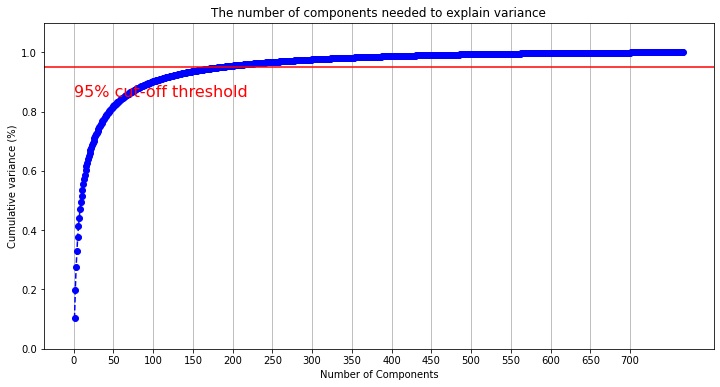

In [9]:
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 768, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 750, step=50)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [10]:
Y = test_data[['Label']] #dependent variable

In [12]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X, Y = sm.fit_sample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [13]:
pca = prince.PCA(
    n_components=200,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42)

In [14]:
pca = pca.fit(X)

In [15]:
pca_result = pca.transform(X)

In [16]:
pca_result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-3.159658,-7.613223,-1.951735,-6.594447,2.155944,3.365243,-5.114255,-6.138061,-0.178581,2.630959,0.924034,-2.343796,0.961434,-0.745022,6.421421,2.070007,3.233876,1.238694,-4.829897,-3.633815,-1.112754,-3.520590,-4.128796,-2.662302,8.023006,-1.470194,0.730817,2.125004,2.618872,-0.560193,-1.240985,-0.023470,-0.888544,-1.129364,1.103327,-1.294838,0.822462,-2.292696,-0.992648,2.795612,...,0.966455,-0.670476,-2.098222,-0.303211,0.754354,-0.234592,1.571997,0.854741,0.621117,-0.350631,0.311723,0.036240,-0.159431,0.652967,0.509385,-0.120384,0.903454,0.784388,-0.155835,-0.480985,-0.450629,-0.096144,-1.201245,1.011533,-0.902849,1.241346,1.061199,-0.764388,0.370112,0.230850,-1.079344,-0.162580,0.222203,-0.374241,0.066641,0.666912,-0.336875,0.146808,-0.023674,0.341097
1,-5.723906,18.604902,-8.188195,-0.831957,6.621388,-3.707592,-3.555947,-3.640215,1.385117,1.035877,-1.211509,1.868647,1.286738,2.957151,-0.649022,-1.646654,-0.994880,0.094854,-0.212952,-0.910342,-0.490069,4.071044,1.482131,3.472031,1.833375,-2.314543,1.240298,0.698691,-1.485256,0.184953,1.255641,-0.325555,-0.965995,2.121368,1.019349,1.322606,-2.241685,2.333286,1.844339,0.430010,...,1.085260,-0.422264,0.270236,-0.240268,0.189968,-0.832938,0.357393,0.714709,0.243406,1.020542,0.129640,0.062740,0.873783,0.076610,-0.409881,-0.705463,0.122450,-0.316946,0.394296,0.381278,-0.584101,0.625404,-0.500957,0.123357,-0.703555,0.496563,0.045384,-0.411855,-0.168161,0.978092,0.172185,-0.364723,-0.163053,0.846138,0.470946,-0.057203,0.471313,0.432024,0.277153,-0.861491
2,9.176351,-1.635566,5.474346,-6.691135,-0.049504,-6.637226,3.098265,-1.924743,-0.434288,-0.471363,0.144496,-0.575610,-1.493774,3.459201,-0.418295,0.106289,3.887093,3.585324,0.554736,-6.602868,-3.813847,4.851465,3.074099,-1.127122,-2.180267,1.526951,0.610989,-2.352415,2.946942,0.045146,1.116273,1.170578,-3.181661,-3.790492,1.702167,1.628762,-2.118664,-0.914070,0.689926,-1.167342,...,-1.111364,0.300313,-0.245846,-0.161818,0.459217,-1.015521,0.497051,1.218528,0.495682,-0.975104,-1.475113,-0.558784,-0.231342,0.649475,-0.197732,0.717532,-1.060445,0.624320,-0.372611,-0.229968,0.477818,0.827929,-0.296403,-1.154783,-0.454057,0.687156,1.033115,-0.958062,0.766107,-0.632514,0.344897,0.059337,-0.417799,-1.238053,0.340263,-1.206703,-0.226333,-0.962310,0.121780,-0.401841
3,-13.672192,-12.307086,-5.715579,-8.539185,-0.370714,-1.998734,1.019918,-2.195767,-4.159569,-0.540471,-4.544917,-1.209547,1.426604,-4.175914,-1.015073,-1.465520,3.025822,2.905900,-1.852549,0.318429,-0.296842,0.037426,-1.519045,-1.027220,1.446446,-1.718399,0.246238,5.489246,1.734288,3.098266,-0.895456,2.245351,-1.604456,0.426356,-0.752803,0.543058,1.807569,0.847243,0.526717,2.386055,...,0.505426,0.164306,-0.718372,0.536498,0.168321,0.335427,-0.264766,0.564801,-0.608123,0.970421,0.188320,-0.785660,1.456746,-0.019667,0.381230,0.618701,-0.472651,0.445123,-0.297622,0.048068,-0.091188,0.027935,0.009218,-0.399406,-0.277051,-0.620436,0.524337,0.476316,-0.472656,-0.348069,-0.532436,0.534798,0.703905,0.768212,-0.376926,0.056243,0.373520,0.004817,-0.451845,0.024416
4,-9.660307,7.606166,6.788124,-4.963901,11.271521,0.004180,-6.171389,8.844607,-0.701776,-1.474881,0.727483,-3.374328,-1.689956,0.989587,-4.787101,-0.944599,-0.690083,1.193690,4.836375,-3.539295,-1.350782,-4.416346,-2.607704,1.737339,-1.283276,2.737113,1.657266,-3.454626,-1.031005,-3.327852,-0.051112,-0.546879,1.390618,-1.915502,-0.994643,-1.101771,-1.090979,-0.855925,2.010239,-3.922990,...,-0.132318,-0.837786,0.938017,-1.208328,-0.061753,-0.142508,1.335232,0.076597,-1.164691,0.335063,0.054506,-0.710746,-0.083139,-0.114375,-0.667579,0.686992,0.632208,0.453578,0.029537,0.260288,0.077426,-0.668208,0.957475,-0.008749,0.423636,0.045563,-0.066798,-0.430571,-0

In [17]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [18]:
Y.rename(columns={0:'Label'}, inplace=True)

In [19]:
Y["Label"] = Y["Label"].astype('category')
Y.dtypes

Label    category
dtype: object

In [20]:
Y["Label"] = Y["Label"].cat.codes

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(pca_result)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
X_scaled = scaler.transform(pca_result)

In [25]:
X_scaled = pd.DataFrame(X_scaled)

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting algo
from sklearn.ensemble import AdaBoostClassifier # adaboost classifie

In [28]:
import pickle

In [29]:
xgboost_model = '/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/xgboost.sav'

In [30]:
loaded_xgboost = pickle.load(open(xgboost_model, 'rb'))

In [31]:
result = loaded_xgboost.score(X_scaled,Y)

In [32]:
print(result)

0.3333333333333333


In [33]:
from keras.models import model_from_json

In [34]:
json_lstm_file = open('/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/model_LSTM.json', 'r')
loaded_model_json = json_lstm_file.read()
json_lstm_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/model_LSTM.h5")
print("Loaded model from disk")

Loaded model from disk


In [35]:
x_test = np.array(X_scaled)
x_test = np.reshape(x_test, (x_test.shape[0],1, x_test.shape[1]))

In [36]:

# evaluate loaded model on test data
import keras
loss_fn = keras.losses.SparseCategoricalCrossentropy()
opt = keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True)
loaded_model.compile(loss= loss_fn, optimizer=opt, metrics = ['accuracy'])
score = loaded_model.evaluate(x_test,Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 43.69%


In [37]:
json_mlp_file = open('/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/model_MLP.json', 'r')
loaded_model_json = json_mlp_file.read()
json_mlp_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/BERT + STOCK /Fine-tuned Models/model_MLP.h5")
print("Loaded model from disk")

Loaded model from disk


In [38]:
# evaluate loaded model on test data
import keras
loss_fn = keras.losses.SparseCategoricalCrossentropy()
opt = keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True)
loaded_model.compile(loss= loss_fn, optimizer=opt, metrics = ['accuracy'])
score = loaded_model.evaluate(x_test,Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 44.85%
